In [8]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900> </p>
<h1 style="text-align: center;"><b>«Домашняя работа»</b></h3>


In [248]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.00,44205297.59,1,82.00,Engineer,10036744.14,NaN,0.73
1,1,2.00,173748959.99,1,32.00,Doctor,10140513.67,0.00,0.38
2,1,6.00,248905477.31,1,14.00,Entertainment,10433180.97,NaN,0.43
3,0,1.00,126871823.00,0,10.00,Lawyer,10042985.31,NaN,0.38
4,1,9.00,85960417.41,1,99.00,Artist,10219081.59,NaN,0.66


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  6000 non-null   int64  
 1   children     6000 non-null   float64
 2   salary       6000 non-null   float64
 3   sex          6000 non-null   int64  
 4   age          6000 non-null   float64
 5   profession   6000 non-null   object 
 6   home_cost    6000 non-null   float64
 7   drive_info   3230 non-null   float64
 8   happyness    6000 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 468.8+ KB


<font color='darkblue'>
### Изменение типов </font>


In [249]:
data['children'] = data['children'].astype('int32') # меняем на int32 т.к. кол-во детей целое число
data['age'] = data['age'].astype('int32') # меняем на int32 т.к. возраст целое число
data['salary'] = data['salary'].astype('int64') # убираем экспотенц вид числа
data['home_cost'] = data['home_cost'].astype('int64') # убираем экспотенц вид числа
data.head()

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4,44205297,1,82,Engineer,10036744,NaN,0.73
1,1,2,173748959,1,32,Doctor,10140513,0.00,0.38
2,1,6,248905477,1,14,Entertainment,10433180,NaN,0.43
3,0,1,126871823,0,10,Lawyer,10042985,NaN,0.38
4,1,9,85960417,1,99,Artist,10219081,NaN,0.66


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">

<b><font color='darkblue'> Задание </font></b>

<font color='darkblue'>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, используя только визуализацию.
</font>

<font color='darkblue'>
   # Изучение датасета: </font>
     
<font color='darkblue'>

* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?
</font>

In [244]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  6000 non-null   int64  
 1   children     6000 non-null   int32  
 2   salary       6000 non-null   int64  
 3   sex          6000 non-null   int64  
 4   age          6000 non-null   int32  
 5   home_cost    6000 non-null   int64  
 6   drive_info   3230 non-null   float64
 7   happyness    6000 non-null   float64
dtypes: float64(2), int32(2), int64(4)
memory usage: 504.0 KB


,was_married,children,salary,sex,age,home_cost,drive_info,happyness
count,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,3230.00,6000.00
mean,0.84,2.89,84634445.47,0.66,31.78,10191838.13,0.73,0.46
std,0.36,2.85,80221297.06,0.47,32.55,312006.65,0.44,0.15
min,0.00,0.00,1765712.00,0.00,2.00,9824378.00,0.00,0.00
25%,1.00,1.00,10926690.00,0.00,10.00,10096392.00,0.00,0.35
50%,1.00,2.00,43015999.00,1.00,17.00,10177162.50,1.00,0.45
75%,1.00,4.00,158831764.50,1.00,32.00,10269196.00,1.00,0.56
max,1.00,9.00,345927135.00,1.00,100.00,20657915.00,1.00,1.00


**Численные признаки:** children, salary, age, home_cost \
**Категориальные признаки:** sex, was_married, professon, drive_info

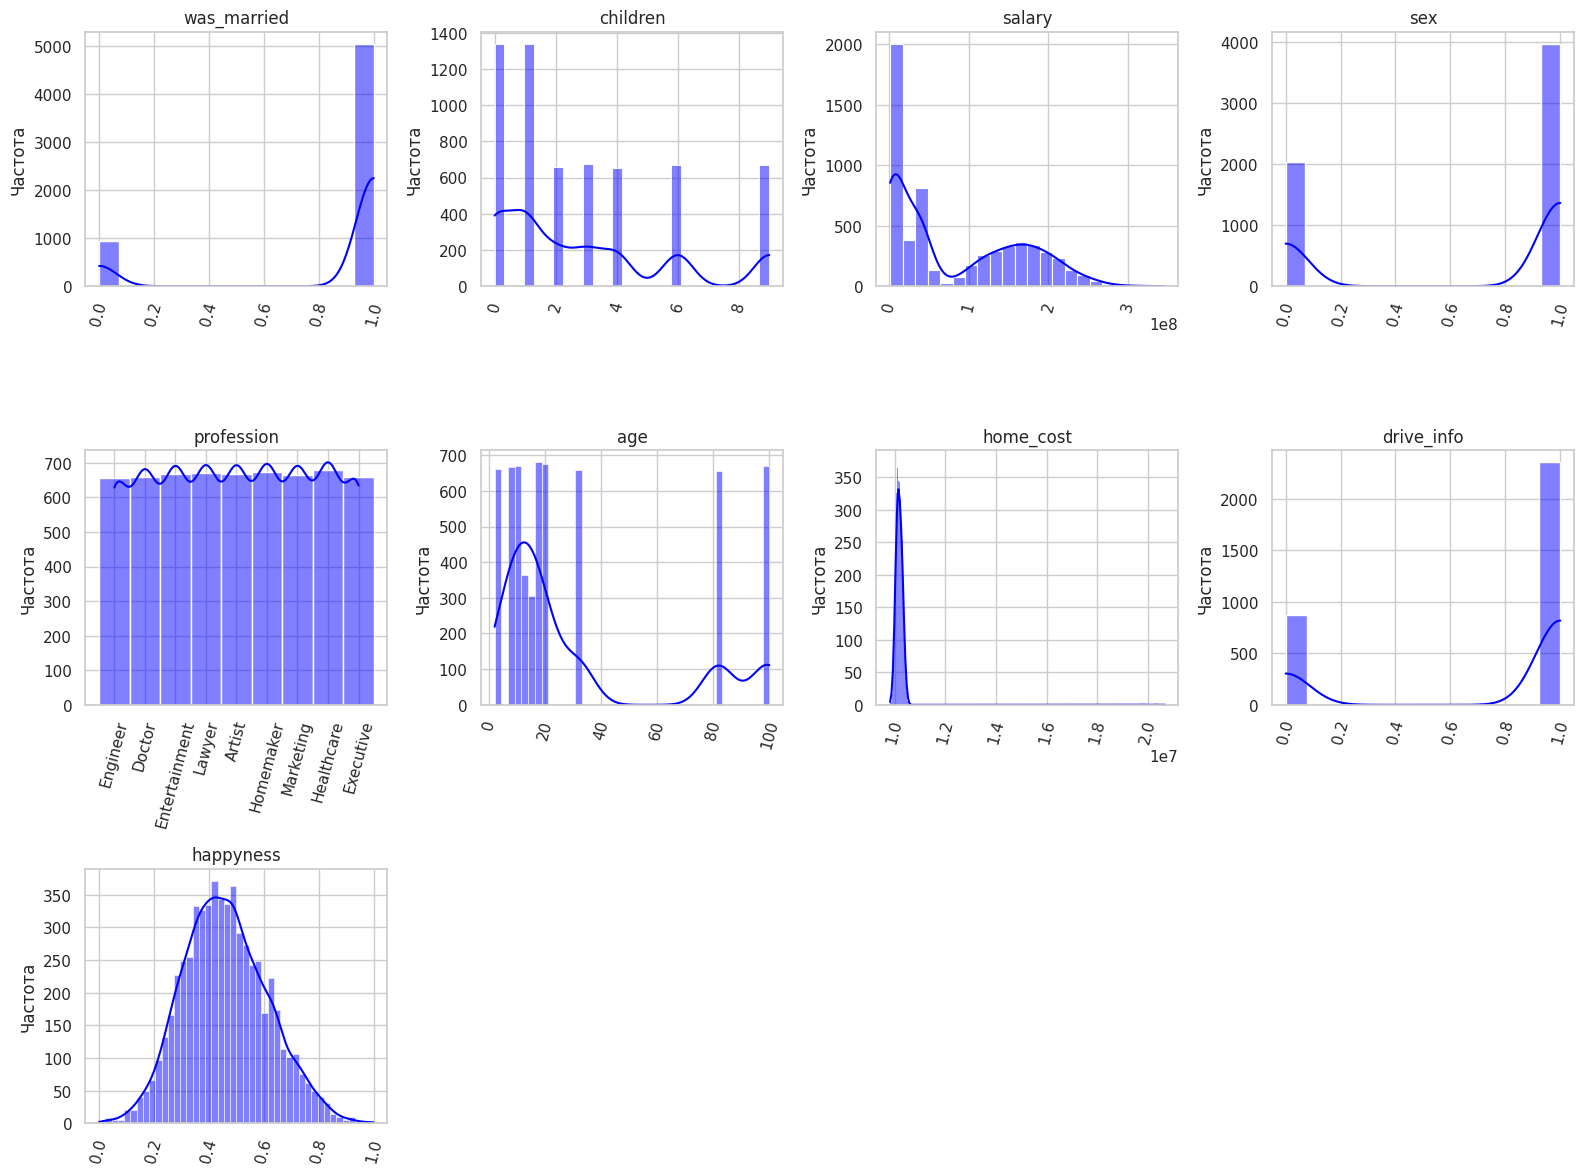

In [259]:
# Признаки
features = ['was_married', 'children', 'salary', 'sex', 'profession', 'age', 'home_cost', 'drive_info', 'happyness']
data2 = data[features]

#Построим несколько графиков в одной фигуре
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data = data2[feature].dropna(), kde=True, color='blue') #kde = true, вычисляется оценка плотности ядра для сглаживания распределения и рисуется линия графика плотности
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('Частота')
    plt.xticks(rotation=75)

plt.tight_layout()
plt.show();

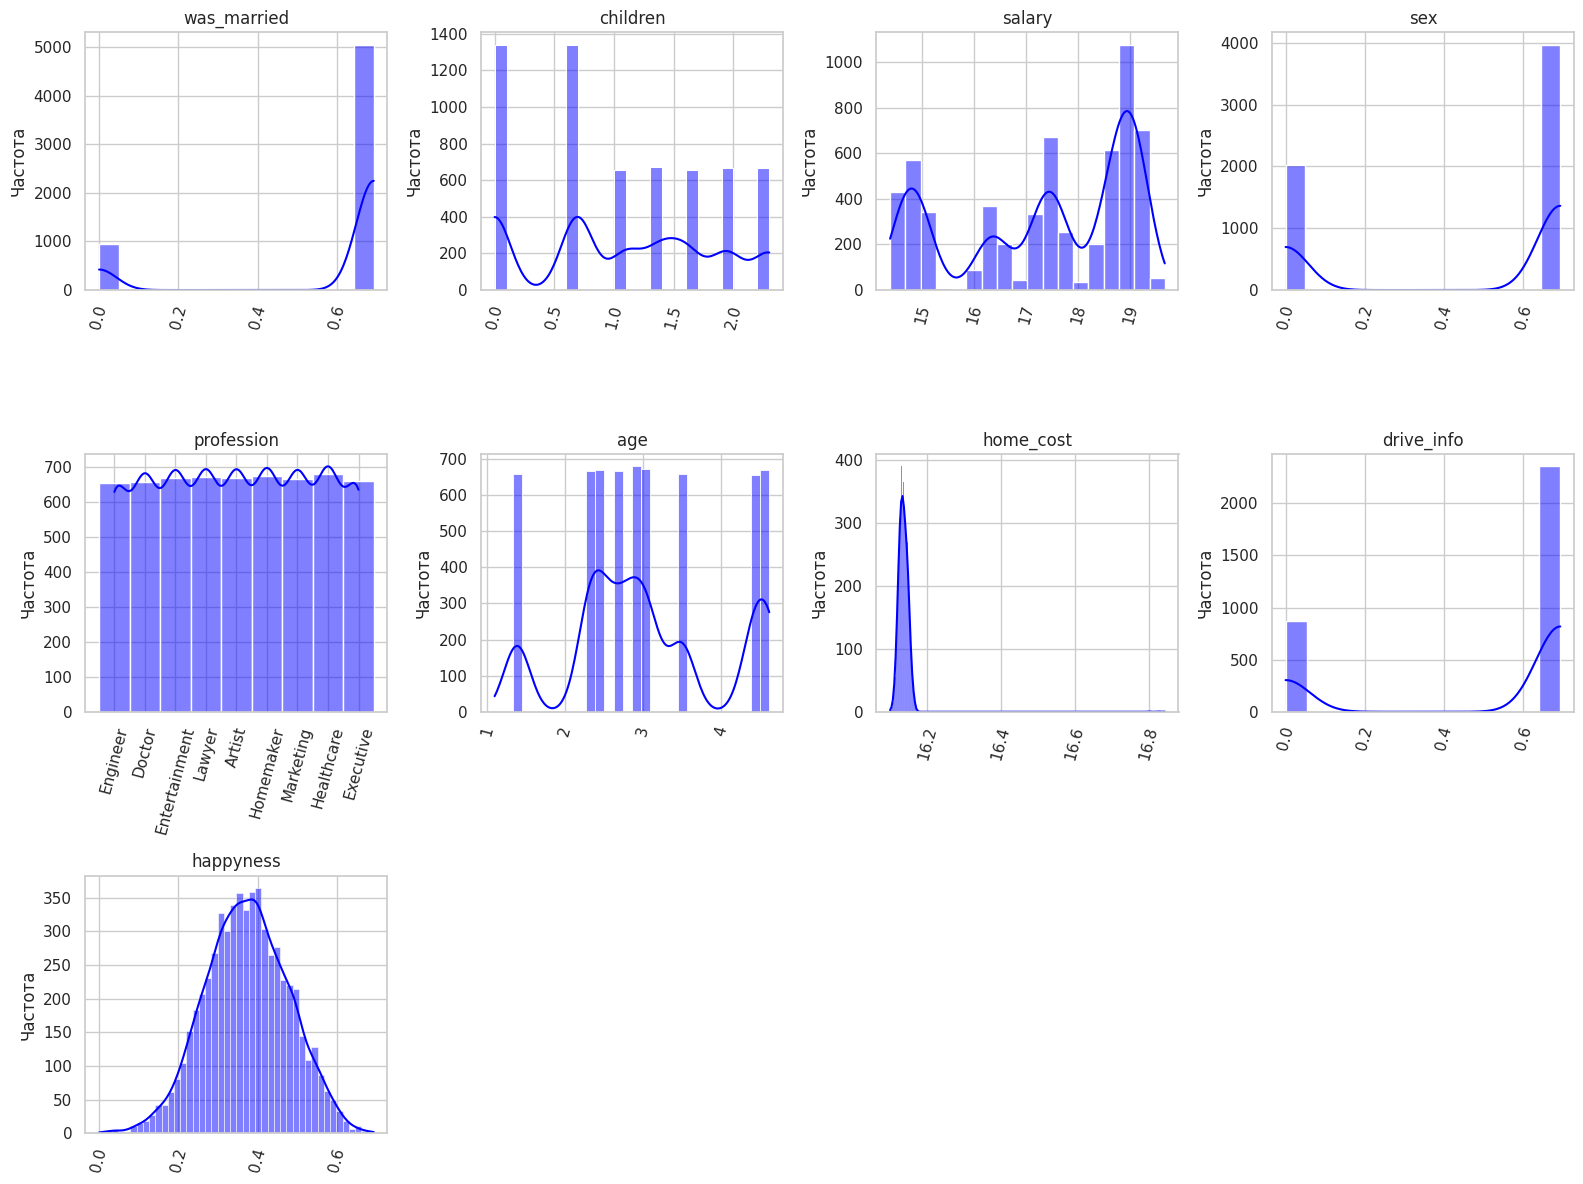

In [260]:
data_log = data.copy()

# Логарифмируем числовые признаки
numerical_features = data_log.select_dtypes(include=[np.number]).columns
data_log[numerical_features] = np.log(data_log[numerical_features] + 1)  #+1 (если есть 0)

# Признаки
features = ['was_married', 'children', 'salary', 'sex', 'profession', 'age', 'home_cost', 'drive_info', 'happyness']
data_log = data_log[features]

#Построим несколько графиков в одной фигуре
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data = data_log[feature].dropna(), kde=True, color='blue') #kde = true, вычисляется оценка плотности ядра для сглаживания распределения и рисуется линия графика плотности
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('Частота')
    plt.xticks(rotation=75)

plt.tight_layout()
plt.show();

**Распределены нормально признаки:** *happyness* \
Признаки *age и salary* содержат много выбросов, чтобы понять тенденцию к нормальному распределению, их нужно почистить от выбросов \
Также **после логарифмирования нормальное распределение**  у признака: *home_cost*

Как выявлен признак *happyness* непонятно, он самый субъективный и, скорее  всего, бессмысленный

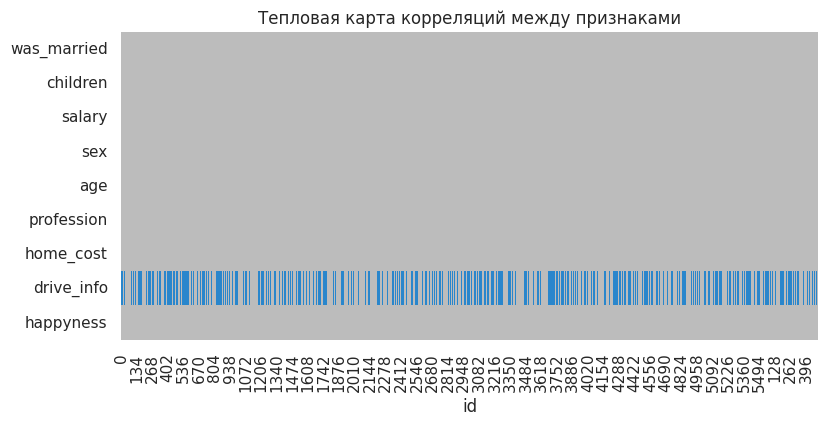

In [10]:
plt.figure(figsize=(9, 4))
plt.title('Тепловая карта корреляций между признаками')
colours = ['#bcbcbc', '#2986cc']
sns.heatmap(data[data.columns].isnull().T, cmap=sns.color_palette(colours), cbar=False)
plt.show()

<font color='darkblue'>
   # Чистка датасета </font>   

<font color='darkblue'>

* Есть ли дубли в данных? Если есть - удалить их (`drop_duplicates`).
* Есть ли пропуски в данных? Если есть - удалить столбцы, в которых они есть. (`dropna()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?
</font>

In [11]:
cleaned_data = data.drop_duplicates(keep = False).copy()
print ('Размеры первичного датасета', data.shape, 'Размеры очищенного датасета', cleaned_data.shape)

Размеры первичного датасета (6000, 9) Размеры очищенного датасета (6000, 9)


Похоже, что дублей нет. Проверим

In [15]:
duplicateRows = data[data.duplicated()]
duplicateRows

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,


In [13]:
print ('Пропусков данных:', cleaned_data.isnull().sum().sum(),'\n', 'Пропуски в колонках:', '\n', cleaned_data.isnull().sum())

Пропусков данных: 2770 
 Пропуски в колонках: 
 was_married       0
children          0
salary            0
sex               0
age               0
profession        0
home_cost         0
drive_info     2770
happyness         0
dtype: int64


In [14]:
print ('Пропусков данных в колонке в %:', (cleaned_data.drive_info.isnull().sum () / len(cleaned_data)*100).round(2))

Пропусков данных в колонке в %: 46.17


Удалим столбцы, в которых они есть

In [16]:
cleaned_data = cleaned_data.dropna().copy()
print ("Размеры первичного датасета", data.shape, "Размеры очищенного датасета", cleaned_data.shape, "\n", '!Потери строк очень большие')

Размеры первичного датасета (6000, 9) Размеры очищенного датасета (3230, 9) 
 !Потери строк очень большие


In [17]:
print ('Пропусков в первичных данных:', data.isnull().sum().sum(), '\n', 'Пропуски в очищенных данных:', cleaned_data.isnull().sum().sum())

Пропусков в первичных данных: 2770 
 Пропуски в очищенных данных: 0


Также можно просто удалить столбец drive_info из набора данных

In [255]:
pd.options.display.float_format = "{:.2f}".format # приводим числа к одному формату
cleaned_data = data.drop_duplicates(keep = False).copy()
cleaned_data_small = cleaned_data.drop('drive_info', axis=1, inplace = False)
print ('Пропусков в первичных данных:', data.isnull().sum().sum(), '\n', 'Пропуски в очищенных данных:', cleaned_data_small.isnull().sum().sum())
cleaned_data_small.head()

Пропусков в первичных данных: 2770 
 Пропуски в очищенных данных: 0


,was_married,children,salary,sex,age,profession,home_cost,happyness
id,,,,,,,,
0,1,4,44205297,1,82,Engineer,10036744,0.73
1,1,2,173748959,1,32,Doctor,10140513,0.38
2,1,6,248905477,1,14,Entertainment,10433180,0.43
3,0,1,126871823,0,10,Lawyer,10042985,0.38
4,1,9,85960417,1,99,Artist,10219081,0.66


<font color='darkblue'>
Найти и удалить выбросы по признаку home_cost. Сколько их?
</font>

In [173]:
stat = cleaned_data_small[['home_cost']].describe(percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T
stat

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
home_cost,6000.00,10191838.13,312006.65,9824378.00,9936120.49,9999790.35,10096392.00,10177162.50,10269196.00,10382831.80,10464036.91,20657915.00


In [174]:
#создадим функци для отметки значения в диапазоне 5% самые нижние и самые высокие home_cost (выбросы)
def attribute(row):
   var = 'normal'
   if row ['home_cost'] < 9999790.42 or ['home_cost'] == 9999790.42:
      var = 'lower_outlier'
   elif row ['home_cost'] > 10382832.55 or ['home_cost'] == 10382832.55:
      var = 'upper_outlier'
   return var

#создадим новую колонку 'attribute' с данными, которые даст функция
cleaned_data_small['attribute'] = cleaned_data_small.apply(attribute, axis=1).copy()
cleaned_data_small.head(7)

,was_married,children,salary,sex,age,profession,home_cost,happyness,attribute
id,,,,,,,,,
0,1,4,44205297,1,82,Engineer,10036744,0.73,normal
1,1,2,173748959,1,32,Doctor,10140513,0.38,normal
2,1,6,248905477,1,14,Entertainment,10433180,0.43,upper_outlier
3,0,1,126871823,0,10,Lawyer,10042985,0.38,normal
4,1,9,85960417,1,99,Artist,10219081,0.66,normal
5,1,3,2474979,0,21,Homemaker,10016535,0.33,normal
6,1,3,2106286,0,21,Homemaker,9980108,0.39,lower_outlier


In [175]:
#посчитаем выбросы home_cost
#определим их
drop_values = ['lower_outlier', 'upper_outlier']

cleaned_data_small = cleaned_data_small[cleaned_data_small.attribute.isin(drop_values) == False ]
print(cleaned_data_small['attribute'].value_counts())

attribute
normal    5400
Name: count, dtype: int64


<font color='darkblue'>
   # Проверка гипотез </font>   

<font color='darkblue'>
Проверьте следующие гипотезы. Для доказательства - используйте визуализацию. (Статистические методы использовать не нужно)
</font>

<div class="alert alert-warning">
   <font color='darkblue'>
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?
   </font>    

In [187]:
cleaned_data_small_groupby = cleaned_data_small.groupby(['sex']).agg(Mean_salary = ('salary','mean'), Median_salary = ('salary','median'), Max_salary = ('salary','max'), Min_salary = ('salary','min'), Count = ('salary','count'))
cleaned_data_small_groupby

,Mean_salary,Median_salary,Max_salary,Min_salary,Count
sex,,,,,
0,57721198.49,3192490.00,259984191,1765712,2029
1,98385887.96,74681090.00,345927135,6548211,3971


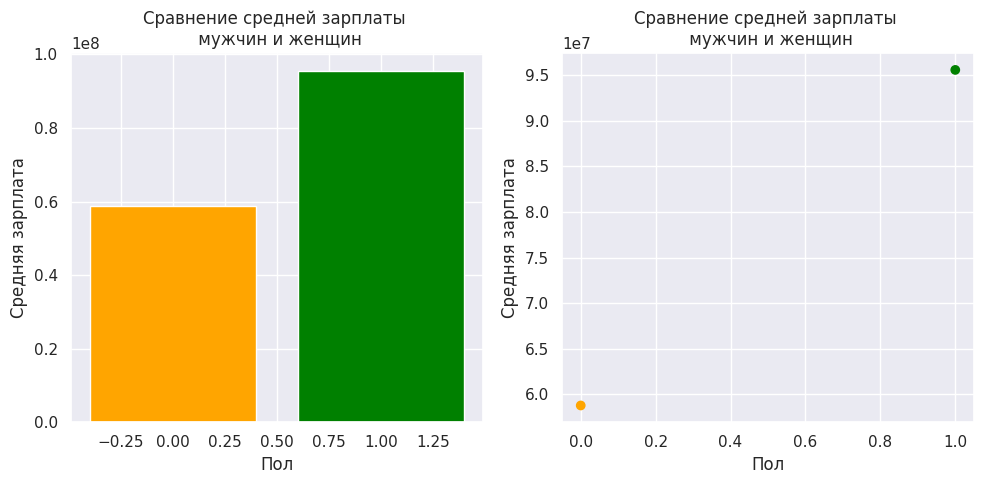

In [24]:
genders = cleaned_data_small_groupby.index
mean_salar = cleaned_data_small_groupby['Mean_salary']
#Построим несколько графиков в одной фигуре
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Диаграмма 1 (столбчатая)
ax[0].bar(genders, mean_salar, color=['orange', 'green'])
ax[0].set_xlabel('Пол')
ax[0].set_ylabel('Средняя зарплата')
ax[0].set_title('Сравнение средней зарплаты \n мужчин и женщин')

# Диаграмма 2 (рассеяния)
ax[1].scatter(cleaned_data_small_groupby.index, cleaned_data_small_groupby['Mean_salary'], color=['orange', 'green'])
ax[1].set_xlabel('Пол')
ax[1].set_ylabel('Средняя зарплата')
ax[1].set_title('Сравнение средней зарплаты \n мужчин и женщин')

plt.tight_layout()
plt.show()

<div class="alert alert-warning">
   <font color='darkblue'>    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?
   </font>   

In [25]:
cleaned_data_small_groupby2 = cleaned_data_small.groupby(['profession']).agg(Mean_salary = ('salary','mean'), Median_salary = ('salary','median'), Max_salary = ('salary','max'), Min_salary = ('salary','min'), Count = ('salary','count'))
cleaned_data_small_groupby2

,Mean_salary,Median_salary,Max_salary,Min_salary,Count
profession,,,,,
Artist,119822066.62,118066200.00,194628372,52722698,642
Doctor,185512512.33,184637930.00,315035478,97957198,566
Engineer,42144825.91,41526640.50,67957412,20643072,616
Entertainment,193643980.24,190277922.00,345927135,84025189,555
Executive,34325860.20,33878170.00,58956129,15703607,629
Healthcare,3210843.04,3208186.50,4550942,2094637,602
Homemaker,2294498.46,2294408.00,2842263,1765712,585
Lawyer,168783819.30,166924517.00,259984191,83867512,605
Marketing,12705031.78,12552513.50,19322054,6548211,600


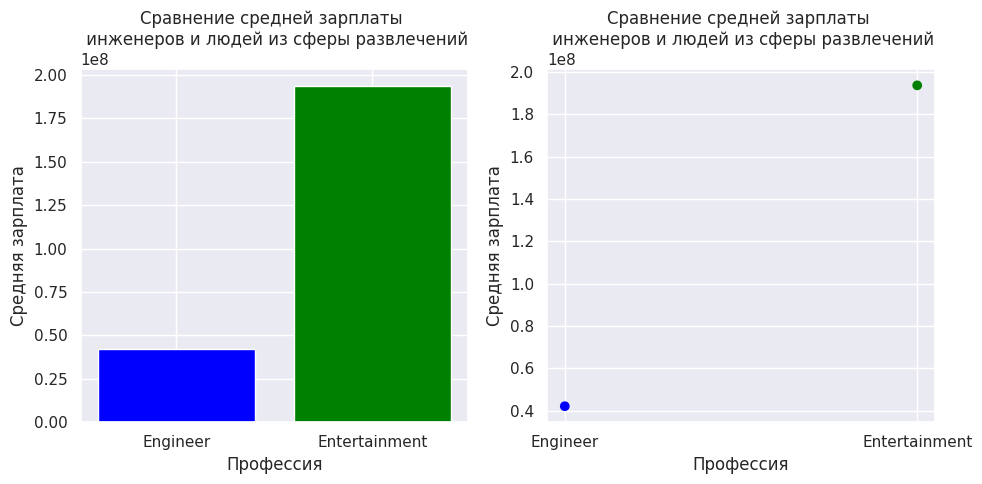

In [26]:
# Выведем на график только Engineer и Entertainment
engineer_entertainment_data = cleaned_data_small_groupby2.loc[['Engineer', 'Entertainment']]

#Построим несколько графиков в одной фигуре
fig, bx = plt.subplots(1, 2, figsize=(10, 5))

# Диаграмма 1 (столбчатая)
bx[0].bar(engineer_entertainment_data.index, engineer_entertainment_data['Mean_salary'], color=['blue', 'green'])
bx[0].set_xlabel('Профессия')
bx[0].set_ylabel('Средняя зарплата')
bx[0].set_title('Сравнение средней зарплаты \n инженеров и людей из сферы развлечений')

# Диаграмма 2 (рассеяния)
bx[1].scatter(engineer_entertainment_data.index, engineer_entertainment_data['Mean_salary'], color=['blue', 'green'])
bx[1].set_xlabel('Профессия')
bx[1].set_ylabel('Средняя зарплата')
bx[1].set_title('Сравнение средней зарплаты \n инженеров и людей из сферы развлечений')

plt.tight_layout()
plt.show()

<div class="alert alert-warning">
   <font color='darkblue'>     
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?
   </font>   

In [188]:
cleaned_data_small['children'] = cleaned_data_small['children'].astype(int) #подкорректируем вывод целых чисел (без нолей после запятой) в колонке дети
cleaned_data_small_groupby3 = cleaned_data_small.groupby(['children']).agg(Mean_salary = ('salary','mean'), Median_salary = ('salary','median'), Max_salary = ('salary','max'), Min_salary = ('salary','min'), Count = ('salary','count'))
cleaned_data_small_groupby3

,Mean_salary,Median_salary,Max_salary,Min_salary,Count
children,,,,,
0,18491331.68,4236744.00,58956129,2094637,1340
1,91025117.09,86197885.50,259984191,6548211,1336
2,186035591.06,184806577.50,315868053,97957198,658
3,2295746.74,2296887.00,2842263,1765712,674
4,42162118.87,41512351.00,71074160,20643072,655
6,194005268.59,190711876.00,345927135,84025189,668
9,119952574.65,118523880.00,194628372,52722698,669


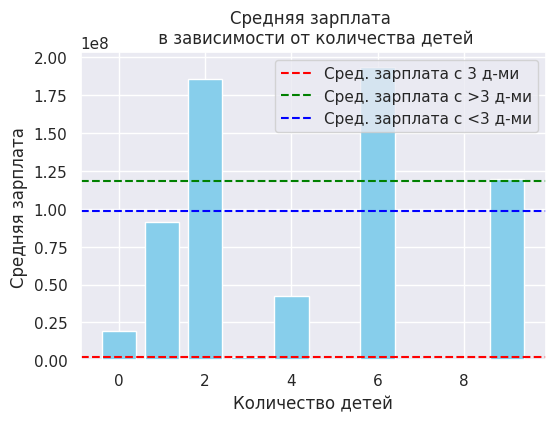

In [28]:
plt.figure(figsize=(6, 4))
plt.bar(cleaned_data_small_groupby3.index, cleaned_data_small_groupby3['Mean_salary'], color='skyblue')
plt.xlabel('Количество детей')
plt.ylabel('Средняя зарплата')
plt.title('Средняя зарплата \n в зависимости от количества детей')

#добавим горизонтальные линии - метки на график, используя срезы по кол-ву детей
plt.axhline(y=cleaned_data_small_groupby3['Mean_salary'][3], color='red', linestyle='--', label='Сред. зарплата с 3 д-ми')
plt.axhline(y=cleaned_data_small_groupby3['Mean_salary'][4:].mean(), color='green', linestyle='--', label='Сред. зарплата с >3 д-ми')
plt.axhline(y=cleaned_data_small_groupby3['Mean_salary'][:3].mean(), color='blue', linestyle='--', label='Сред. зарплата с <3 д-ми')

plt.legend()
plt.show()

Да, те у кого **больше трех детей** в данной выборке, **зарабатывают в среднем больше**, чем те, у кого меньше или трое детей.

Попробуем построить 2 график. Так как надо либо логарифмировать 1 график, либо нормализовывать.

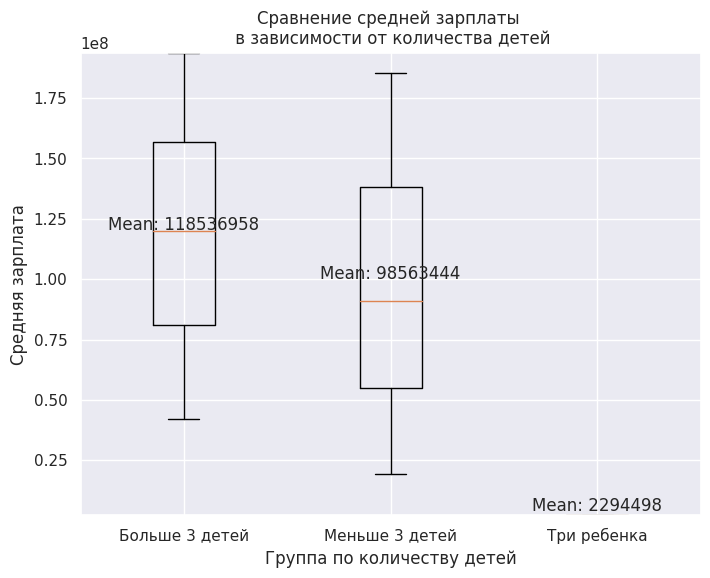

In [96]:
#выделим группы, используя срезы по кол-ву детей (4:9 - Больше 3 детей, 0:2 - Меньше 3 детей, 3 - Три ребенка)
salary_more_than_3_children = cleaned_data_small_groupby3.loc[4:9, 'Mean_salary']
salary_less_than_3_children = cleaned_data_small_groupby3.loc[0:2, 'Mean_salary']
salary_3_children = cleaned_data_small_groupby3.loc[3, 'Mean_salary']

# Диаграмма 2(boxplot)
plt.figure(figsize=(8, 6))
plt.boxplot([salary_more_than_3_children, salary_less_than_3_children, salary_3_children], labels=['Больше 3 детей', 'Меньше 3 детей', 'Три ребенка'])
plt.xlabel('Группа по количеству детей')
plt.ylabel('Средняя зарплата')
plt.title('Сравнение средней зарплаты \n в зависимости от количества детей')

#Min_salary = cleaned_data_small['salary'].min()
#Max_salary = cleaned_data_small['salary'].max()
#plt.ylim(Min_salary - 1, Max_salary + 1) #(Min_salary/2, Max_salary/1.5)
# Устанавливаем параметры для оси Y
Min_salary = min(salary_more_than_3_children.min(), salary_less_than_3_children.min(), salary_3_children)
Max_salary = max(salary_more_than_3_children.max(), salary_less_than_3_children.max(), salary_3_children)
plt.ylim(Min_salary-0.5, Max_salary+0.5)

# Добавляем метки для средних значений зарплат
plt.text(1, np.mean(salary_more_than_3_children), f"Mean: {np.mean(salary_more_than_3_children):.0f}", ha='center', va='bottom')
plt.text(2, np.mean(salary_less_than_3_children), f"Mean: {np.mean(salary_less_than_3_children):.0f}", ha='center', va='bottom')
plt.text(3, np.mean(salary_3_children), f"Mean: {np.mean(salary_3_children):.0f}", ha='center', va='bottom')

plt.show()

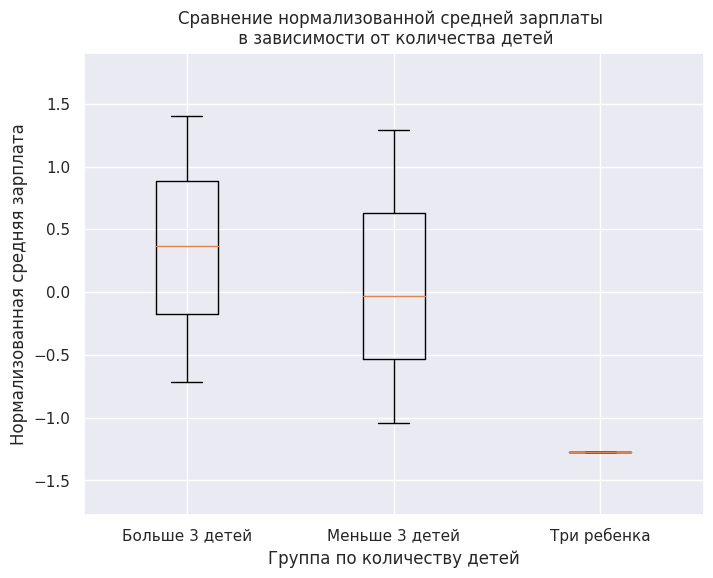

In [75]:
from sklearn.preprocessing import StandardScaler

# нормализуем данные через StandardScaler
scaler = StandardScaler()
cleaned_data_small_groupby3['Normalized_salary'] = scaler.fit_transform(cleaned_data_small_groupby3['Mean_salary'].values.reshape(-1, 1))

# выделим группы, используя срезы по кол-ву детей (4:9 - Больше 3 детей, 0:2 - Меньше 3 детей, 3 - Три ребенка)
salary_more_than_3_children = cleaned_data_small_groupby3.loc[4:9, 'Normalized_salary'].values
salary_less_than_3_children = cleaned_data_small_groupby3.loc[0:2, 'Normalized_salary'].values
salary_3_children = cleaned_data_small_groupby3.loc[3, 'Normalized_salary']

# Диаграмма 2(boxplot)
plt.figure(figsize=(8, 6))
plt.boxplot([salary_more_than_3_children, salary_less_than_3_children, [salary_3_children]], labels=['Больше 3 детей', 'Меньше 3 детей', 'Три ребенка'])
plt.xlabel('Группа по количеству детей')
plt.ylabel('Нормализованная средняя зарплата')
plt.title('Сравнение нормализованной средней зарплаты \n в зависимости от количества детей')

#  передадим параметры для оси Y
Min_salary = min(salary_more_than_3_children.min(), salary_less_than_3_children.min(), salary_3_children)
Max_salary = max(salary_more_than_3_children.max(), salary_less_than_3_children.max(), salary_3_children)
plt.ylim(Min_salary-0.5, Max_salary+0.5)

plt.show()

<div class="alert alert-warning">
   <font color='darkblue'>     
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?
   </font>   

In [120]:
cleaned_data_small_groupby4 = cleaned_data_small.groupby(['profession']).agg(Mean_home_cost = ('home_cost','mean'), Median_home_cost = ('home_cost','median'), Max_home_cost = ('home_cost','max'), Min_home_cost = ('home_cost','min'), Count = ('home_cost','count')).round(0)
cleaned_data_small_groupby4

,Mean_home_cost,Median_home_cost,Max_home_cost,Min_home_cost,Count
profession,,,,,
Artist,10218076.00,10219081.00,10382495,10021473,642
Doctor,10269492.00,10279938.00,10382799,10034759,566
Engineer,10144952.00,10139659.00,10377265,10000357,616
Entertainment,10281067.00,10294288.00,10382739,10010914,555
Executive,10138250.00,10135405.00,10371379,10000150,629
Healthcare,10110436.00,10101218.00,10358049,9999813,602
Homemaker,10115978.00,10110056.00,10377708,10000235,585
Lawyer,10255704.00,10256841.00,10380864,10007175,605
Marketing,10119891.00,10115397.00,10344832,9999794,600


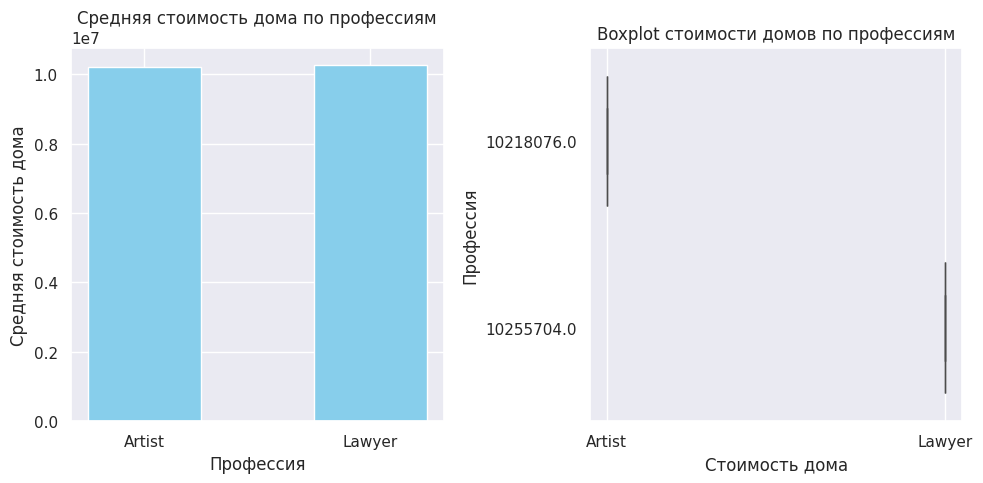

In [154]:
# Выведем на график только Artist и Lawyer
artist_lawyer_data = cleaned_data_small_groupby4.loc[['Artist', 'Lawyer']]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# диаграмма 1 (столбчатая)
axs[0].bar(artist_lawyer_data.index, artist_lawyer_data['Mean_home_cost'], color='skyblue', width=0.5)
axs[0].set_xlabel('Профессия')
axs[0].set_ylabel('Средняя стоимость дома')
axs[0].set_title('Средняя стоимость дома по профессиям')

# диаграмма 2 (Boxplot)
boxplot = sns.boxplot(x='profession', y='Mean_home_cost', data = artist_lawyer_data, orient = 'h', ax = axs[1], width=0.7, boxprops=dict(alpha=1), whiskerprops=dict(alpha=1))
axs[1].set_xlabel('Стоимость дома')
axs[1].set_ylabel('Профессия')
axs[1].set_title('Boxplot стоимости домов по профессиям')

plt.tight_layout()
plt.show()

In [159]:
artist_lawyer_data

,Mean_home_cost,Median_home_cost,Max_home_cost,Min_home_cost,Count
profession,,,,,
Artist,10218076.00,10219081.00,10382495,10021473,642
Lawyer,10255704.00,10256841.00,10380864,10007175,605


In [166]:
print ('Отношение разницы в % незначительное:', (((cleaned_data_small_groupby4.loc['Lawyer', 'Mean_home_cost'] / cleaned_data_small_groupby4.loc['Artist', 'Mean_home_cost']) - 1) * 100).round(2))

Отношение разницы в % незначительное: 0.37


<div class="alert alert-warning">
   <font color='darkblue'>     
* Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?
   </font>

In [203]:
# объединенная группировка и вычисление средней стоимости недвижимости для каждой группы
cleaned_data_small_groupby5 = cleaned_data_small.groupby('was_married')['home_cost'].mean()
print(cleaned_data_small_groupby5, '\n')
if cleaned_data_small_groupby5.iloc[1] > cleaned_data_small_groupby5.iloc[0]:
    print("Недвижимость у тех, кто когда-либо был в браке, в среднем дороже, чем у тех, кто никогда не был в браке")
else:
    print("Недвижимость у тех, кто когда-либо был в браке, в среднем не дороже, чем у тех, кто никогда не был в браке")

was_married
0   10277030.84
1   10175851.85
Name: home_cost, dtype: float64 

Недвижимость у тех, кто когда-либо был в браке, в среднем не дороже, чем у тех, кто никогда не был в браке


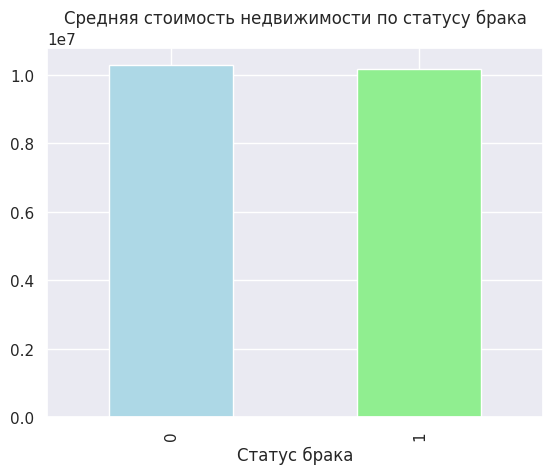

In [211]:
cleaned_data_small_groupby5.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Средняя стоимость недвижимости по статусу брака')
plt.xlabel('Статус брака');

<div class="alert alert-warning">
   <font color='darkblue'>      
* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?
   </font>
   
**Подсказка** - составьте матрицу смежности, она выглядит примерно вот так:


In [ ]:
# ******  был в браке | не был в браке |
# мужчины      140    |      499       |
# женщины      241    |      298       |

In [212]:
# Заменяем числовые значения на категории "женщины" и "мужчины", "в браке" и "не в браке"
cleaned_data_small2 = cleaned_data_small.copy()
cleaned_data_small2['sex'] = cleaned_data_small2['sex'].map({0: 'female', 1: 'male'}) #map применяет к каждому элементу
cleaned_data_small2['was_married'] = cleaned_data_small2['was_married'].map({0: 'Not married', 1: 'Married'})

# матрица смежности
matrix = pd.crosstab(cleaned_data_small2['sex'], cleaned_data_small2['was_married'])
matrix

was_married,Married,Not married
sex,,
female,1359,670
male,3693,278


In [227]:
print ('Отношение N женатых мужчин к N замужних женщин - Женатых мужчин больше в :', (matrix.loc['male', 'Married'] / matrix.loc['female', 'Married']).round(2), 'раза')

Отношение N женатых мужчин к N замужних женщин - Женатых мужчин больше в : 2.72 раза
